In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from utils import Gestures

In [10]:
# Copy paste from serial connection
array = [0.95, 0.98, 0.85, 0.95, 0.97, 0.85, 0.95, 0.98, 0.84, 0.96, 0.98, 0.84, 0.96, 0.97, 0.84, 0.95, 0.98, 0.85, 0.95, 0.98, 0.83, 0.96, 0.98, 0.85, 0.95, 0.95, 0.85, 0.96, 0.98, 0.84, 0.95, 0.96, 0.84, 0.95, 0.98, 0.84, 0.95, 0.97, 0.84, 0.95, 0.98, 0.84, 0.95, 0.99, 0.86, 0.96, 0.99, 0.85, 0.96, 0.98, 0.85, 0.95, 0.99, 0.85, 0.96, 0.99, 0.85, 0.96, 0.99, 0.85, 0.96, 0.99, 0.85, 0.96, 0.98, 0.86, 0.96, 1.00, 0.85, 0.97, 0.99, 0.86, 0.96, 0.99, 0.85, 0.96, 0.99, 0.85, 0.96, 0.98, 0.85, 0.96, 0.98, 0.85, 0.96, 0.99, 0.85, 0.96, 0.98, 0.85, 0.95, 0.98, 0.85, 0.96, 0.97, 0.85, 0.96, 0.98, 0.84, 0.94, 0.98, 0.84, 0.94, 0.97, 0.82, 0.93, 0.96, 0.81, 0.92, 0.96, 0.81, 0.92, 0.94, 0.79, 0.92, 0.93, 0.80, 0.92, 0.94, 0.80, 0.92, 0.94, 0.79, 0.92, 0.93, 0.80, 0.91, 0.93, 0.79, 0.92, 0.93, 0.79, 0.92, 0.93, 0.78, 0.91, 0.92, 0.77, 0.91, 0.91, 0.76, 0.90, 0.88, 0.77, 0.88, 0.88, 0.75, 0.88, 0.86, 0.74, 0.86, 0.86, 0.72, 0.84, 0.82, 0.70, 0.81, 0.78, 0.68, 0.78, 0.73, 0.62, 0.72, 0.66, 0.55, 0.65, 0.57, 0.47, 0.57, 0.46, 0.34, 0.52, 0.39, 0.16, 0.50, 0.37, 0.11, 0.54, 0.41, 0.24, 0.59, 0.48, 0.38, 0.62, 0.55, 0.46, 0.68, 0.61, 0.52, 0.70, 0.65, 0.56, 0.72, 0.66, 0.58, 0.73, 0.67, 0.59, 0.69, 0.63, 0.56, 0.65, 0.59, 0.50, 0.58, 0.52, 0.42, 0.50, 0.37, 0.21, 0.42, 0.25, 0.04, 0.42, 0.27, 0.00, 0.48, 0.36, 0.18, 0.56, 0.48, 0.36, 0.64, 0.58, 0.47, 0.71, 0.65, 0.54, 0.75, 0.71, 0.61, 0.80, 0.77, 0.64, 0.84, 0.79, 0.69, 0.85, 0.84, 0.72, 0.87, 0.86, 0.74, 0.90, 0.88, 0.76, 0.91, 0.90, 0.77, 0.90, 0.91, 0.77, 0.91, 0.92, 0.80, 0.92, 0.92, 0.80, 0.92, 0.94, 0.81, 0.92, 0.94, 0.80, 0.93, 0.94, 0.80, 0.92, 0.95, 0.82, 0.92, 0.94, 0.81, 0.92, 0.93, 0.81, 0.93, 0.94, 0.81, 0.92, 0.95, 0.82, 0.92, 0.94, 0.82, 0.92, 0.96, 0.82, 0.93, 0.95, 0.82, 0.92, 0.96, 0.82, 0.92, 0.94, 0.82, 0.92, 0.95, 0.83,
]

shaped_array = np.array(array, dtype=np.float32).reshape((100, 3))
int_array = np.array(shaped_array * 255, dtype=np.uint8)

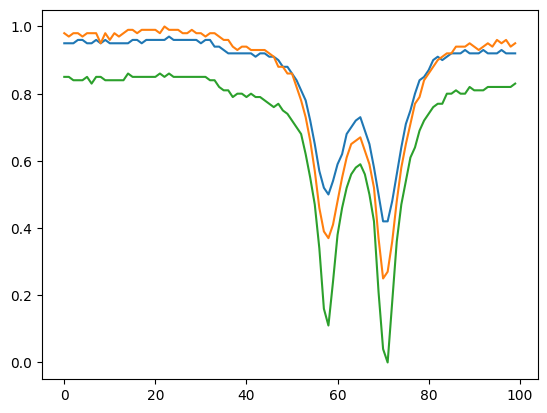

In [11]:
plt.plot(shaped_array)
plt.show()

In [12]:
from tensorflow.lite.python.interpreter import OpResolverType

# Quantized test
model_name = "conv_lstm_16"
tflite_test = tf.lite.Interpreter(f'../models/{model_name}/{model_name}_quantized.tflite')
tflite_test.allocate_tensors()
print(tflite_test.get_input_details()[0]['shape'])

input_index = tflite_test.get_input_details()[0]["index"]
output_index = tflite_test.get_output_details()[0]["index"]

tensor = tf.convert_to_tensor([shaped_array], dtype=np.float32)
tflite_test.set_tensor(input_index, tensor)
tflite_test.invoke()

output = tflite_test.get_tensor(output_index)
print(output)
print("So the answer is %d or '%s'" % (np.argmax(output), Gestures(np.argmax(output))))

[  1 100   3]
[[0.         0.         0.         0.         0.7421875  0.19921875
  0.00390625 0.0078125  0.015625   0.0234375 ]]
So the answer is 4 or 'clockwise'


In [13]:
# tflite_test.reset_all_variables()
tflite_test.invoke()

output = tflite_test.get_tensor(output_index)
print(output)
print("So the answer is %d or '%s'" % (np.argmax(output), Gestures(np.argmax(output))))

[[0.         0.         0.         0.         0.734375   0.20703125
  0.00390625 0.0078125  0.015625   0.0234375 ]]
So the answer is 4 or 'clockwise'
